In [135]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from portfolio import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
lista1 = ['imeu','ceu','smea']
lista1 = ['inaa','iusa','csspx']
lista1 = ['xgle', 'ibtm', 'ibgm', 'ibgl','em15']
lista1 = ['iusa','imeu','ibtm','xgle','phau']



In [136]:
df = read_quotes(lista1)


In [128]:
# SALVA LE QUOTAZIONI su file
df.to_csv('quote_mach2.csv')

In [132]:
norm_df = df/df.iloc[0]

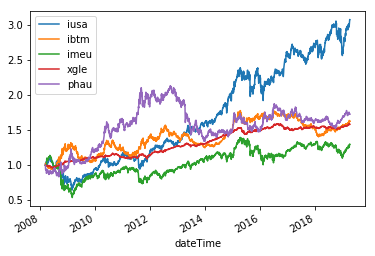

In [134]:
norm_df.plot()